In [1]:
import sys

sys.path.append("../../src")
from main.transporter_dataset import create_dataset
from main.eval import full_test
from main.compositions import calculate_aac, calculate_paac
from main.pssm import calculate_pssms_notebook
import matplotlib.pyplot as plt
import seaborn as sns

LOG_FILE = "../../logs/athaliana_amino_sugar_potassium.log"

In [2]:
sodium = ["Q2UVJ5", "O04034", "Q9FKP1", "Q9LJI2", "Q9SYG9", "Q84TI7"]
gdu = ["O81775", "Q9SW07", "Q9FHH5", "Q8S8A0", "Q3E965", "Q3EAV6", "Q3E8L0"]
df_all = create_dataset(
    keywords_substrate_filter=[
        # "Protein transport",
        # "Ion transport",
        "Electron transport",
        "Sugar transport",
        "Potassium transport",
        # "Translocation",
        "mRNA transport",
        # "Hydrogen ion transport",
        # "Amino-acid transport",
        # "Lipid transport",
        # "Calcium transport",
        # "Iron transport",
        # "Phosphate transport",
        # "Zinc transport",
        # "Sulfate transport",
        # "Peptide transport",
        # "Copper transport",
        # "Sodium transport",
        # "Chloride",
        # "Anion exchange",
        # "Ammonia transport",
        # "Nickel transport",
        # "Oxygen transport",
    ],
    keywords_component_filter=["Transmembrane"],
    keywords_transport_filter=["Transport"],
    input_file="../../data/raw/swissprot/uniprot-reviewed_yes.tab.gz",
    multi_substrate="integrate",
    outliers=gdu + sodium,
    verbose=True,
    tax_ids_filter=[3702],
    output_log=LOG_FILE,
    sequence_clustering=70,
)


cd-hit: clustered 251 sequences into 191 clusters at threshold 70


# Feature generation

In [28]:
df_aac = calculate_aac(df_all.sequence)
df_paac = calculate_paac(df_all.sequence)
# df_pssm = calculate_pssms_notebook(df_all.sequence)
labels = df_all.keywords_transport
labels.value_counts()

Sugar transport        84
Electron transport     56
Potassium transport    50
mRNA transport          1
Name: keywords_transport, dtype: int64

# Eval AAC

############################################################
Feature reduction:  None
############################################################


/home/andy/miniconda3/envs/subpred/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andy/miniconda3/envs/subpred/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andy/miniconda3/envs/subpred/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

,0,1,2,3,4,5,6,7,8,9
svc__C,1,10,10,10,10,10,10,1,10,10
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,None,balanced
svc__decision_function_shape,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo
svc__gamma,scale,0.01,0.01,0.01,scale,0.01,scale,scale,0.01,0.01


F1 score       
dataset          test  train
label                       
Electron        0.850  0.873
Hydrogen ion    0.330  0.501
Potassium       0.934  0.913
Sugar           0.911  0.910
mean            0.756  0.799

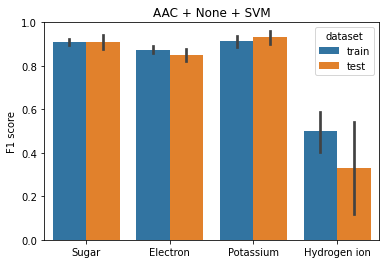

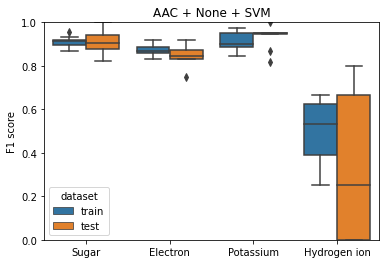

############################################################
Feature reduction:  kbest
############################################################


/home/andy/miniconda3/envs/subpred/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andy/miniconda3/envs/subpred/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andy/miniconda3/envs/subpred/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

,0,1,2,3,4,5,6,7,8,9
selectkbest__k,15,19,17,17,15,15,19,19,17,11
svc__C,10,10,10,10,10,10,10,1,10,1
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
svc__decision_function_shape,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo
svc__gamma,0.1,0.01,0.01,0.01,scale,0.01,scale,scale,0.01,scale


F1 score       
dataset          test  train
label                       
Electron        0.849  0.865
Hydrogen ion    0.520  0.526
Potassium       0.930  0.913
Sugar           0.895  0.920
mean            0.799  0.806

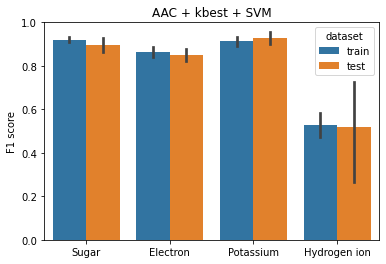

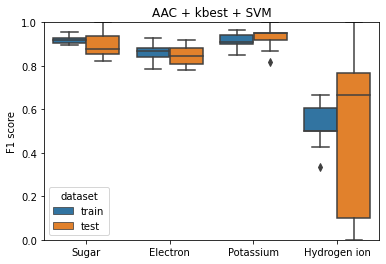

In [26]:
for dim_reduction in [None, "kbest"]:
    print("#"*60)
    print("Feature reduction: ", dim_reduction)
    print("#"*60)
    df_scores, df_params = full_test(df_aac, labels, kernel="rbf", dim_reduction=dim_reduction, select_k_steps=2)
    df_scores.label = df_scores.label.map(lambda x: x.replace(" transport", ""))

    display(df_params)
    df_scores_piv = df_scores.groupby(["label", "dataset"]).mean().unstack(1)
    df_scores_piv.loc["mean"] = df_scores_piv.mean()
    display(df_scores_piv.round(3))

    g = sns.barplot(data=df_scores, y="F1 score", x="label", hue="dataset")
    g.set_ylim((0,1))
    g.set_xlabel("")
    g.set_title(f"AAC + {dim_reduction} + SVM")
    plt.show()

    g = sns.boxplot(data=df_scores, y="F1 score", x="label", hue="dataset")
    g.set_xlabel("")
    g.set_ylim((0,1))
    g.set_title(f"AAC + {dim_reduction} + SVM")
    plt.show()

# Eval PAAC

############################################################
Feature reduction:  None
############################################################


,0,1,2,3,4,5,6,7,8,9
svc__C,10,10,1,10,10,10,10,10,10,10
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
svc__decision_function_shape,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo
svc__gamma,scale,scale,scale,scale,scale,scale,scale,scale,scale,scale


F1 score       
dataset                  test  train
label                               
Amino-acid transport    0.701  0.750
Electron transport      0.892  0.867
Potassium transport     0.951  0.918
Sugar transport         0.883  0.885
mean                    0.857  0.855

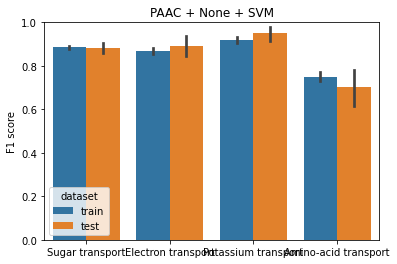

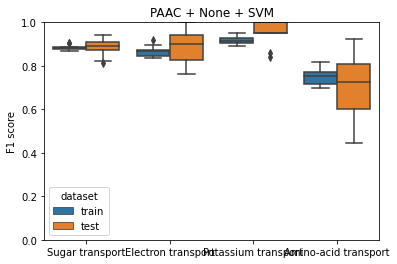

############################################################
Feature reduction:  pca
############################################################


,0,1,2,3,4,5,6,7,8,9
pca__n_components,0.99,0.99,0.99,0.99,0.99,0.8,0.99,0.99,0.99,0.81
svc__C,10,1,1,10,10,10,10,10,1,10
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
svc__decision_function_shape,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo
svc__gamma,scale,scale,scale,scale,scale,0.01,scale,scale,scale,0.01


F1 score       
dataset                  test  train
label                               
Amino-acid transport    0.665  0.647
Electron transport      0.564  0.581
Potassium transport     0.842  0.777
Sugar transport         0.802  0.773
mean                    0.718  0.694

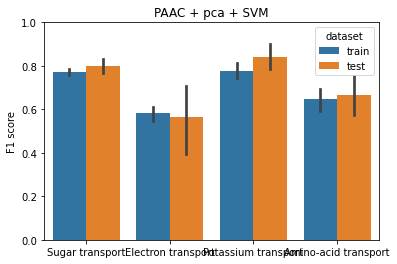

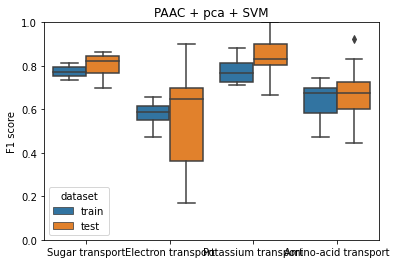

############################################################
Feature reduction:  kbest
############################################################


,0,1,2,3,4,5,6,7,8,9
selectkbest__k,218,260,214,324,267,232,192,348,296,284
svc__C,10,10,10,10,10,10,10,10,1,10
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
svc__decision_function_shape,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo
svc__gamma,scale,scale,scale,scale,scale,scale,scale,scale,scale,scale


F1 score       
dataset                  test  train
label                               
Amino-acid transport    0.734  0.805
Electron transport      0.884  0.886
Potassium transport     0.955  0.925
Sugar transport         0.884  0.904
mean                    0.864  0.880

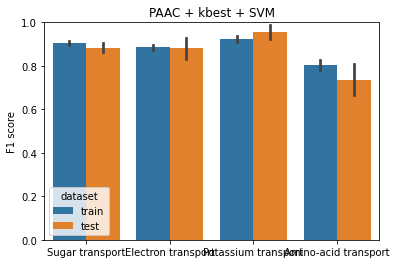

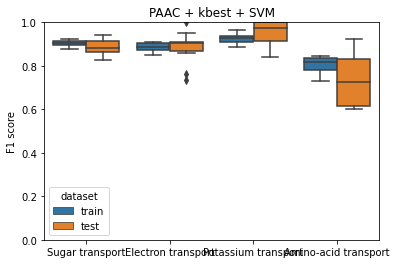

In [5]:
for dim_reduction in [None, "pca", "kbest"]:
    print("#"*60)
    print("Feature reduction: ", dim_reduction)
    print("#"*60)
    df_scores, df_params = full_test(df_paac, labels, kernel="rbf", dim_reduction=dim_reduction)
    df_scores.label = df_scores.label.map(lambda x: x.replace(" transport", ""))

    display(df_params)
    df_scores_piv = df_scores.groupby(["label", "dataset"]).mean().unstack(1)
    df_scores_piv.loc["mean"] = df_scores_piv.mean()
    display(df_scores_piv.round(3))

    g = sns.barplot(data=df_scores, y="F1 score", x="label", hue="dataset")
    g.set_ylim((0,1))
    g.set_xlabel("")
    g.set_title(f"PAAC + {dim_reduction} + SVM")
    plt.show()

    g = sns.boxplot(data=df_scores, y="F1 score", x="label", hue="dataset")
    g.set_xlabel("")
    g.set_ylim((0,1))
    g.set_title(f"PAAC + {dim_reduction} + SVM")
    plt.show()

# PSSM

In [ ]:
for dim_reduction in [None, "kbest"]:
    print("#" * 60)
    print("Feature reduction: ", dim_reduction)
    print("#" * 60)
    df_scores, df_params = full_test(
        df_pssm,
        labels,
        kernel="rbf",
        dim_reduction=dim_reduction,
        feature_filter="pssm",
        select_k_steps=10,
    )
    df_scores.label = df_scores.label.map(lambda x: x.replace(" transport", ""))

    display(df_params)
    df_scores_piv = df_scores.groupby(["label", "dataset"]).mean().unstack(1)
    df_scores_piv.loc["mean"] = df_scores_piv.mean()
    display(df_scores_piv.round(3))

    g = sns.barplot(data=df_scores, y="F1 score", x="label", hue="dataset")
    g.set_ylim((0, 1))
    g.set_xlabel("")
    g.set_title(f"PSSM + {dim_reduction} + SVM")
    plt.show()

    g = sns.boxplot(data=df_scores, y="F1 score", x="label", hue="dataset")
    g.set_xlabel("")
    g.set_ylim((0, 1))
    g.set_title(f"PSSM + {dim_reduction} + SVM")
    plt.show()
